In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize

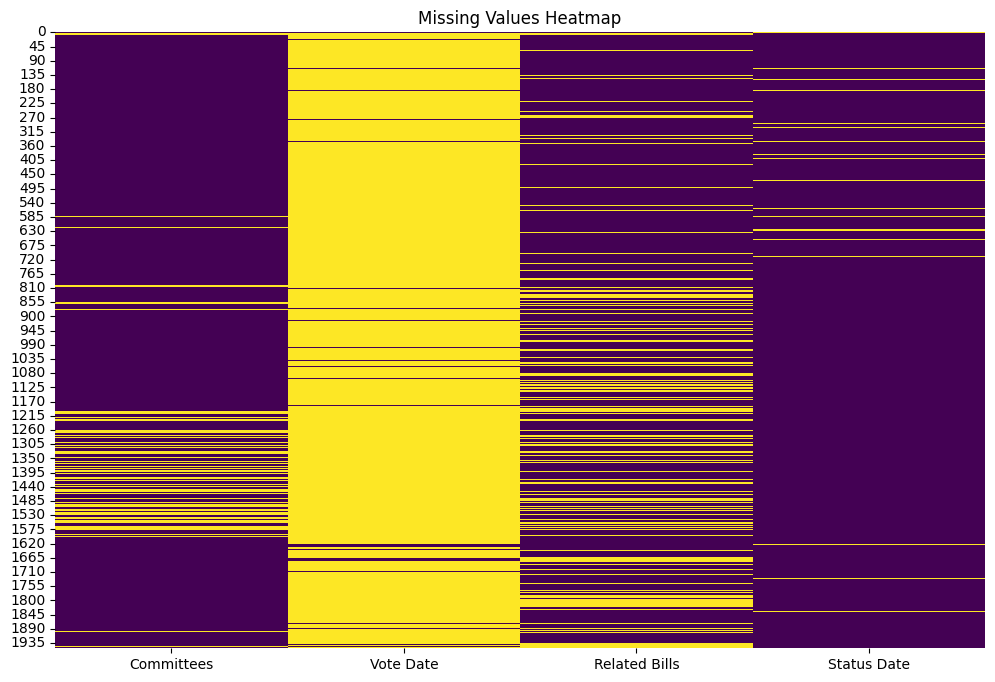

In [8]:
# read csv file
df = pd.read_csv('clean_congress_bills_data.csv')

# find columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index

# only select the columns with missing values
df_missing = df[missing_columns]

# heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_missing.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_43200\3705634699.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


columns after filling out with KNN:
Cosponsor Count                0
Has Cosponsors                 0
Chemistry                      0
Terrorism                      0
Customs enforcement            0
                              ..
Joint Committee on Printing    0
Homeland security              0
support                        0
Labor-management relations     0
cable                          0
Length: 822, dtype: int64


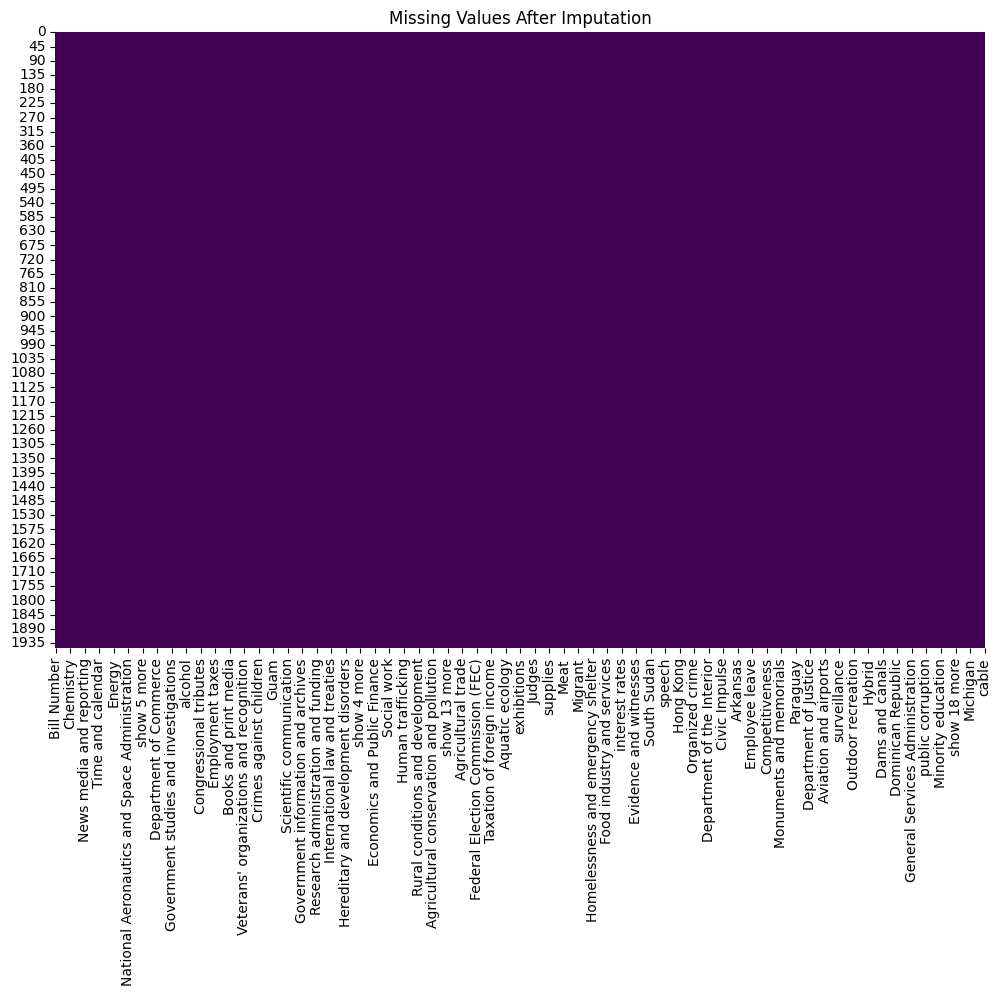

In [9]:
# choose column type
num_cols = df.select_dtypes(include=[np.number]).columns

# use knn
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

# use mode to fill out
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# show after 
print("columns after filling out with KNN:")
print(df[num_cols].isnull().sum())

# create heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Imputation")
plt.show()

Checking column: Cosponsor Count
Cosponsor Count coulmn exists 219 outliers


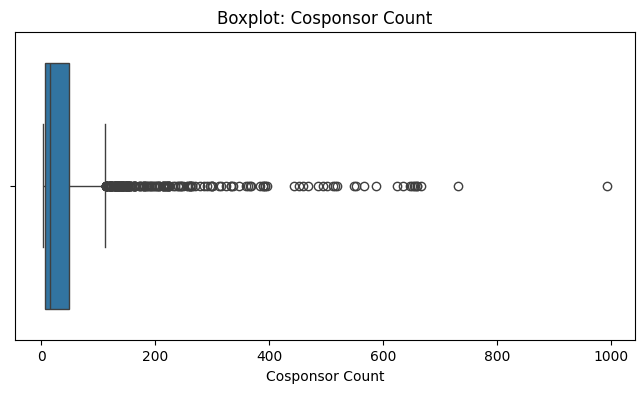

In [10]:
df = pd.read_csv('clean_congress_bills_data.csv')


numeric_columns = df.select_dtypes(include=[np.number]).columns

# Winsorization function
def winsorize_series(s, limits=[0.05, 0.05]):
    return winsorize(s, limits=limits)

# check outliers
for col in numeric_columns:
    if df[col].nunique() > 2:  # skip 0/1 columns
        print(f"Checking column: {col}")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

        if len(outliers) > 1:
            print(f"{col} coulmn exists {len(outliers)} outliers")
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])  
            plt.title(f"Boxplot: {col}")
            plt.show()

        
        df[col] = winsorize_series(df[col], limits=[0.05, 0.05])

In [11]:
df.to_csv('clean_congress_bills_data_outliers_handled.csv', index=False)
print("Outliers cleaned and save into the new file: clean_congress_bills_data_outliers_handled.csv")

Outliers cleaned and save into the new file: clean_congress_bills_data_outliers_handled.csv
